# Udacity Wrangling & Analyzing Twitter Data (WeRateDogs Project)

### Soner Nefsiogullari

The aim of this project is to practice what I learned in the lessons from Udacity Data Analyst Nanodegree Program. I will use tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

Since I have not installed tweepy yet, first I install, then import tweepy library which I will use it to get tweets with API from Twitter database. However, if you already have tweepy installed in your python notebook, you do not have to install it again.

In [2]:
!pip install tweepy

In [1]:
#import major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
from tweepy import OAuthHandler
from tweepy import Stream
from datetime import datetime,timedelta
import json 
import csv
import sys
import os
import time
%matplotlib inline

### Reading Data

In [2]:
df = pd.read_csv("twitter-archive-enhanced.csv") # read the twitter_archive_enhanced.csv file into to df dataframe 
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# use requests library to download tsv file from a URL
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# read the mage_predictions.tsv file into to image_predictions dataframe    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [10]:
# query tweets using tweet_id information from the dataframe
tweet_ids = list(df.tweet_id)
tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 760641137271070720


Rate limit reached. Sleeping for: 551


Error for: 758474966123810816
Error for: 754011816964026368


Rate limit reached. Sleeping for: 524


Error for: 676949632774234114


In [207]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4)

In [208]:
df_tweet = pd.read_json('tweet_json.txt',orient='index')
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2565,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,517,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


### Data Assessment

Let's have a look at structure and information of dataframes.

In [14]:
df.info() # information about twitter-archive-enhanced dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The attributes below have missing values:
* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id
* retweeted_status_user_id, 
* retweeted_status_timestamp

#### Quality Issues

* tweet_id has to be categorical, however it is integer in our dataframe now.
* Text column contains the shortened URL of the tweet
* We have incorrect dog names
* We have missing values in 'name' and dog stages showing as 'None'
* The numerators and demominators could not always show correctly to the score

#### Tidiness Issues
* Instead of doggo, floofer, pupper and puppo columns, it is better to have 1 column (called: stage) and 4 category
* Instead of having datetime information into two columns, it is better to have in 1 column
* Datetime column need to be converted to datetime object
* Rating columns need to be converted to float

In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There is no missing value in dataframe.

#### Quality Issues

* tweet_id has to be categorical, however it is integer in our dataframe now.
* 'img_num' does not provide new information




In [16]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
entities                         2341 non-null object
extended_entities                1820 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null int64
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

#### Quality Issues
* There is a lot of missing values and attributes that have no information
* Dataset contains retweets as well
* Sources are difficult to read
* Datatypes are incorrect suc as; source, id, in_reply_to_status_id, in_reply_to_user_id

#### Tidiness Issues
* Join 'df_tweet' and 'image_predictions' to 'df'

### Data Cleaning

In [5]:
# copy the dataframes to keep orginal files  
df_clean = df.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_clean = df_tweet.copy()

Combining type of dog information into 1 categorical attribute called "stage".

In [6]:
df_clean['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

Let's check if it is correctly applied:

In [69]:
df_clean.stage.value_counts()

None                    1976
pupper                   245
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

The results shows that there are some dogs typed as both stage. Let's clean those as well:

In [7]:
df_clean['stage'].replace("doggoNonepupperNone","doggo", inplace=True)
df_clean['stage'].replace("doggoflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("doggoNoneNonepuppo","puppo", inplace=True)

In [71]:
df_clean.stage.value_counts()

None       1976
pupper      245
doggo        95
puppo        30
floofer      10
Name: stage, dtype: int64

Delete retweets by filtering the NaN of retweeted_status_user_id

In [8]:
df_clean = df_clean[pd.isnull(df_clean['retweeted_status_user_id'])]

Test:

In [73]:
print(sum(df_clean.retweeted_status_user_id.value_counts()))

0


In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         2175 non

We already know that timestamp value is string. Let's change it: 

In [9]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

Test

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         

Now we can split timestamp into date and time:

In [10]:
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['day'] = df_clean['timestamp'].dt.day

In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         

Get rid of columns that will not be used further :

In [11]:
df_clean = df_clean.drop(['source','in_reply_to_status_id',
                          'in_reply_to_user_id',
                          'retweeted_status_id',
                          'retweeted_status_user_id', 
                          'retweeted_status_timestamp', 
                          'expanded_urls', 
                          'doggo','floofer','pupper','puppo','timestamp'], 1)

In [12]:
df_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,2017,7,29


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: int64(6), object(3)
memory usage: 169.9+ KB


Change tweet_id from integer to string:

In [14]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: int64(5), object(4)
memory usage: 169.9+ KB


In [84]:
type(df_clean['tweet_id'].iloc[0])

str

Change rating numerator and denominator from integer to float:

In [15]:
df_clean[['rating_numerator', 'rating_denominator']] = df_clean[['rating_numerator','rating_denominator']].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 169.9+ KB


In [16]:
df_clean.rating_denominator.unique()

array([  10.,    0.,   15.,   70.,    7.,  150.,   11.,  170.,   20.,
         50.,   90.,   80.,   40.,  130.,  110.,   16.,  120.,    2.])

In [17]:
df_clean.loc[(df_clean.rating_denominator != 10.0)]

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0,0.0,None,None,2017,2,24
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0,None,None,2017,2,16
433,820690176645140481,The floofs have been released I repeat the flo...,84.0,70.0,None,None,2017,1,15
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0,Sam,None,2016,12,19
902,758467244762497024,Why does this never happen at my front door......,165.0,150.0,None,None,2016,7,28
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9.0,11.0,None,None,2016,6,8
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204.0,170.0,this,None,2016,5,13
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4.0,20.0,None,None,2016,4,21
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,50.0,Bluebert,None,2016,4,3
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0,None,None,2016,3,27


We see from table above, that some dogs have denominator different than 10 and the numarator also rated according to that number. There is one 0 value in denominator that we will eleminate or change it with regard to numerator.

In order to decide the true rating we have to look at full text messages. So we need to display full text in the column:

In [20]:
# setting column width to see full text
pd.set_option('display.max_colwidth', -1)

In [21]:
df_clean.loc[(df_clean.rating_denominator != 10.0)]

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,1000.0,None,None,2017,2,24
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0,None,None,2017,2,16
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,None,None,2017,1,15
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,None,2016,12,19
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,None,None,2016,7,28
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0,None,None,2016,6,8
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,this,None,2016,5,13
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0,None,None,2016,4,21
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,Bluebert,None,2016,4,3
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,None,None,2016,3,27


Now, we can check the ratings from text and fixed the numerator and denominator values:

In [23]:
df_clean.loc[(df_clean.tweet_id == '835246439529840640'), 'rating_denominator'] = 13.5
df_clean.loc[(df_clean.tweet_id == '835246439529840640'), 'rating_numerator'] = 10.0

df_clean.drop(df_clean[df_clean.tweet_id == '832088576586297345'].index, inplace=True) # this tweet is not a rating

df_clean.loc[(df_clean.tweet_id == '810984652412424192'), 'rating_denominator'] = 13.0
df_clean.loc[(df_clean.tweet_id == '810984652412424192'), 'rating_numerator'] = 10.0

df_clean.loc[(df_clean.tweet_id == '740373189193256964'), 'rating_denominator'] = 14.0
df_clean.loc[(df_clean.tweet_id == '740373189193256964'), 'rating_numerator'] = 10.0

df_clean.loc[(df_clean.tweet_id == '722974582966214656'), 'rating_denominator'] = 13.0
df_clean.loc[(df_clean.tweet_id == '722974582966214656'), 'rating_numerator'] = 10.0

df_clean.loc[(df_clean.tweet_id == '716439118184652801'), 'rating_denominator'] = 11.0
df_clean.loc[(df_clean.tweet_id == '716439118184652801'), 'rating_numerator'] = 10.0

df_clean.loc[(df_clean.tweet_id == '686035780142297088'), 'rating_denominator'] = 12.0
df_clean.loc[(df_clean.tweet_id == '686035780142297088'), 'rating_numerator'] = 10.0

df_clean.loc[(df_clean.tweet_id == '682962037429899265'), 'rating_denominator'] = 10.0
df_clean.loc[(df_clean.tweet_id == '682962037429899265'), 'rating_numerator'] = 10.0

df_clean.loc[(df_clean.tweet_id == '666287406224695296'), 'rating_denominator'] = 9.0
df_clean.loc[(df_clean.tweet_id == '666287406224695296'), 'rating_numerator'] = 10.0

In [24]:
df_clean.loc[(df_clean.rating_denominator == 0.0)]

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day


Let's create a column shows the ratings and get rid of numerator and denominator columns:

In [25]:
df_clean['rating'] = 10 * df_clean['rating_numerator'] / df_clean['rating_denominator'].astype(float)

In [26]:
df_clean.rating.unique()

array([  1.30000000e+01,   1.20000000e+01,   1.40000000e+01,
         5.00000000e+00,   1.70000000e+01,   1.10000000e+01,
         1.00000000e+01,   4.20000000e+02,   6.66000000e+02,
         6.00000000e+00,   1.82000000e+02,   1.50000000e+01,
         7.40740741e+00,   0.00000000e+00,   7.00000000e+00,
         7.69230769e+00,   7.50000000e+01,   2.70000000e+01,
         3.00000000e+00,   8.00000000e+00,   9.00000000e+00,
         4.00000000e+00,   1.77600000e+03,   7.14285714e+00,
         9.09090909e+00,   1.00000000e+00,   8.33333333e+00,
         1.25000000e+01,   2.60000000e+01,   2.00000000e+00,
         1.11111111e+01])

Let's have a look at the 0 ratings:

In [29]:
df_clean.loc[(df_clean.rating_numerator == 0.0)]

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day,rating
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10.0,None,None,2017,2,24,0.0
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0.0,10.0,None,None,2016,6,26,0.0


Well, actually they are really got 0.

In [30]:
df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], 1)

In [31]:
df_clean.head()

,tweet_id,text,name,stage,year,month,day,rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,2017,8,1,13.0
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,2017,8,1,13.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,None,2017,7,31,12.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,None,2017,7,30,13.0
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,None,2017,7,29,12.0


In [32]:
# let's have a look at tweets with decimals in rating in 'text' column in order to avoid wrong ratings
with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating']])

C:\Users\tcsnefsiogullari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [33]:
df_clean.loc[(df_clean.tweet_id == '883482846933004288'), 'rating'] = 13.5
df_clean.loc[(df_clean.tweet_id == '786709082849828864'), 'rating'] = 9.75
df_clean.loc[(df_clean.tweet_id == '778027034220126208'), 'rating'] = 11.27
df_clean.loc[(df_clean.tweet_id == '681340665377193984'), 'rating'] = 9.5
df_clean.loc[(df_clean.tweet_id == '680494726643068929'), 'rating'] = 11.2

In [34]:
df_clean.tail()

,tweet_id,text,name,stage,year,month,day,rating
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None,None,2015,11,16,5.0
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a,None,2015,11,16,6.0
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a,None,2015,11,15,9.0
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,a,None,2015,11,15,7.0
2355,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,None,None,2015,11,15,8.0


In [35]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [36]:
df_clean.name.value_counts()

None         679
a            55 
Charlie      11 
Lucy         11 
Cooper       10 
Oliver       10 
Penny        9  
Tucker       9  
Winston      8  
the          8  
Sadie        8  
Lola         8  
Toby         7  
Daisy        7  
Bailey       6  
an           6  
Koda         6  
Bella        6  
Jax          6  
Stanley      6  
Bo           6  
Oscar        6  
Milo         5  
Buddy        5  
Scout        5  
Leo          5  
Rusty        5  
Bentley      5  
Louis        5  
Dave         5  
            ..  
Jessifer     1  
Link         1  
Kane         1  
Dawn         1  
all          1  
Venti        1  
Crumpet      1  
Caryl        1  
Grizzwald    1  
Augie        1  
Petrick      1  
Bradlay      1  
Fabio        1  
Miley        1  
Damon        1  
Julio        1  
Lacy         1  
Josep        1  
Mary         1  
Shawwn       1  
Kona         1  
Florence     1  
Timmy        1  
Joshwa       1  
Boots        1  
Maude        1  
Gin          1  
Ron          1

We have a lot of "none","a", "an" , "the" names in the dataframe. It is better to clean them:

In [37]:
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)

Replace None vaules with real None

In [38]:
df_clean['name'].replace("None", np.nan, inplace=True)
df_clean['name'].replace("None", np.nan, inplace=True)

In [39]:
df_clean.name.value_counts()

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny       9 
Tucker      9 
Sadie       8 
Lola        8 
Winston     8 
Toby        7 
Daisy       7 
Jax         6 
Bella       6 
Koda        6 
Stanley     6 
Oscar       6 
Bailey      6 
Bo          6 
Dave        5 
Scout       5 
Leo         5 
Milo        5 
Chester     5 
Louis       5 
Buddy       5 
Bentley     5 
Rusty       5 
Clarence    4 
Derek       4 
Alfie       4 
           .. 
Link        1 
Kane        1 
Dawn        1 
all         1 
Taco        1 
Timison     1 
Venti       1 
Petrick     1 
Kona        1 
Bradlay     1 
Fabio       1 
Miley       1 
Damon       1 
Julio       1 
Lacy        1 
Josep       1 
Chase       1 
Mary        1 
Florence    1 
Crumpet     1 
Timmy       1 
Joshwa      1 
Boots       1 
Maude       1 
Gin         1 
Ron         1 
Skye        1 
Shawwn      1 
Caryl       1 
Bodie       1 
Name: name, Length: 952, dtype: int64

In [40]:
df_clean.tail()

,tweet_id,text,name,stage,year,month,day,rating
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,None,2015,11,16,5.0
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,None,2015,11,16,6.0
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,None,2015,11,15,9.0
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,None,2015,11,15,7.0
2355,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,None,2015,11,15,8.0


Save cleaned data:

In [41]:
df_clean.to_csv('twitter_archive_clean.csv')

#### Now let's clean image predictions:

In [42]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [125]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Change tweed_id to string:

In [43]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

We see that there are probabilities that shows image is dog or not, we can eleminate if the probabilty is low:

In [44]:
not_dog = image_predictions_clean[(image_predictions_clean["p1_dog"] == False) &
         (image_predictions_clean["p2_dog"] == False) &
         (image_predictions_clean["p3_dog"] == False)]["tweet_id"].index
also_not_dog = image_predictions_clean[(image_predictions_clean["p1_dog"] == False) &
         (image_predictions_clean["p2_conf"] < 0.25) &
         (image_predictions_clean["p3_conf"] < 0.25)]["tweet_id"].index

row_toremoved = not_dog.append(also_not_dog)
image_predictions_clean.drop(row_toremoved, inplace=True)

In [130]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1549 non-null object
jpg_url     1549 non-null object
img_num     1549 non-null int64
p1          1549 non-null object
p1_conf     1549 non-null float64
p1_dog      1549 non-null bool
p2          1549 non-null object
p2_conf     1549 non-null float64
p2_dog      1549 non-null bool
p3          1549 non-null object
p3_conf     1549 non-null float64
p3_dog      1549 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 125.6+ KB


Image number also does not give any information, let's drop it:

In [45]:
image_predictions_clean = image_predictions_clean.drop(['img_num'], 1)

In [46]:
image_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We have underscore _ in p1, p2, and p3 attributes, let's fixed them:

In [47]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [48]:
image_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Save cleaned data:

In [49]:
image_predictions_clean.to_csv('image_predictions_clean.csv')

#### Now let's clean tweet dataframe:

In [156]:
df_tweet_clean.tail(50)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1997-12-20 14:14:30.321602560,NaN,NaN,2017-07-05 15:48:34,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,27820,0,NaN,882627270321602560,882627270321602560,...,NaN,NaN,NaN,6116,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has his first swim lesson ...,1,"{'contributors_enabled': False, 'created_at': ..."
1997-12-22 03:51:34.511734784,NaN,NaN,2017-07-06 00:46:41,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/D4...,28237,0,NaN,882762694511734784,882762694511734784,...,NaN,NaN,NaN,4942,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,0,"{'contributors_enabled': False, 'created_at': ..."
1997-12-24 19:34:40.364220416,NaN,NaN,2017-07-06 15:58:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ty...,23887,0,NaN,882992080364220416,882992080364220416,...,NaN,NaN,NaN,3936,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,0,"{'contributors_enabled': False, 'created_at': ..."
1997-12-26 06:30:36.046086144,NaN,NaN,2017-07-07 00:17:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/Se...,37110,0,NaN,883117836046086144,883117836046086144,...,NaN,NaN,NaN,6696,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,0,"{'contributors_enabled': False, 'created_at': ..."
1997-12-29 01:58:10.899218434,NaN,NaN,2017-07-07 16:22:55,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,22496,0,NaN,883360690899218432,883360690899218432,...,NaN,NaN,NaN,3688,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,1,"{'contributors_enabled': False, 'created_at': ..."
1997-12-30 11:54:06.933004288,NaN,NaN,2017-07-08 00:28:19,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/qj...,45821,0,NaN,883482846933004288,883482846933004288,...,NaN,NaN,NaN,10006,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,0,"{'contributors_enabled': False, 'created_at': ..."
1998-01-03 14:35:22.936631299,NaN,NaN,2017-07-09 00:00:04,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,21829,0,NaN,883838122936631296,883838122936631296,...,NaN,NaN,NaN,3455,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Noah. He can't believe someone made th...,1,"{'contributors_enabled': False, 'created_at': ..."
1998-01-07 08:44:30.584377345,NaN,NaN,2017-07-09 21:29:42,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,20331,0,NaN,884162670584377344,884162670584377344,...,NaN,NaN,NaN,2994,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,1,"{'contributors_enabled': False, 'created_at': ..."
1998-01-08 08:24:38.851493888,NaN,NaN,2017-07-10 03:08:17,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,72794,0,NaN,884247878851493888,884247878851493888,...,"{'contributors': None, 'coordinates': None, 'c...",8.839657e+17,8.839657e+17,20513,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,0,"{'contributors_enabled': False, 'created_at': ..."
1998-01-10 14:16:45.382717440,NaN,NaN,2017-07-10 15:58:53,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,26904,0,NaN,884441805382717440,884441805382717440,...,NaN,NaN,NaN,5668,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",1,"{'contributors_enabled': False, 'created_at': ..."


In [140]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
entities                         2341 non-null object
extended_entities                1820 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null int64
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

In [50]:
df_tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True) #change column name to able to use it later in joining 

In [51]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

(array([ 742.,  488.,  279.,  164.,  156.,   95.,   72.,   54.,   63.,
          31.,   30.,   28.,   11.,   17.,   17.,    9.,    6.,    4.,
           3.,    6.,    5.,    4.,    6.,    7.,    7.,    3.,    3.,
           2.,    0.,    2.,    6.,    1.,    1.,    0.,    2.,    0.,
           0.,    0.,    0.,    3.,    1.,    2.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    2.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([     0.  ,    770.36,   1540.72,   2311.08,   3081.44,   3851.8 ,
          4622.16,   5392.52,   6162.88,   6933.24,   7703.6 ,   8473.96,
          9244.32,  10014.68,  10785.04,  11555.4 ,  12325.76,

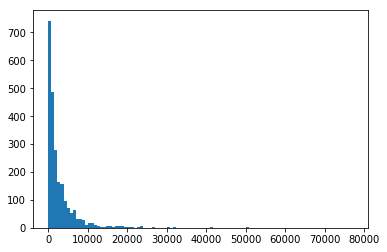

In [54]:
plt.hist(df_tweet_clean.retweet_count, bins=100)

In [55]:
df_tweet_clean.describe()

,contributors,coordinates,favorite_count,favorited,geo,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2341.000000,2341.0,0.0,2.341000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2341.000000,2203.0,2203.0,2.500000e+01,2.500000e+01,2341.000000,2341.0,2341.000000
mean,NaN,NaN,8043.354549,0.0,NaN,7.423022e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.013242,0.0,0.0,8.169687e+17,8.169687e+17,3013.538659,0.0,0.105510
std,NaN,NaN,12104.973802,0.0,NaN,6.837916e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.114335,0.0,0.0,5.734278e+16,5.734278e+16,5012.441830,0.0,0.307276
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,7.061659e+17,7.061659e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1398.000000,0.0,NaN,6.783802e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.000000,0.0,0.0,7.888183e+17,7.888183e+17,604.000000,0.0,0.000000
50%,NaN,NaN,3519.000000,0.0,NaN,7.186315e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.322683e+17,8.322683e+17,1403.000000,0.0,0.000000
75%,NaN,NaN,9940.000000,0.0,NaN,7.987020e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.664587e+17,8.664587e+17,3506.000000,0.0,0.000000
max,NaN,NaN,142890.000000,0.0,NaN,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,77036.000000,0.0,1.000000


We could find original tweets from retweeted_status:

In [56]:
df_tweet_clean[df_tweet_clean['retweeted_status'].notnull()==True]

contributors  coordinates          created_at  \
1991-02-26 06:48:02.905632768 NaN           NaN          2015-11-20 03:51:47   
1991-02-26 06:48:24.950915073 NaN           NaN          2015-11-20 03:51:52   
1992-07-24 17:26:49.858043904 NaN           NaN          2016-03-21 19:31:59   
1993-07-28 05:05:15.802583040 NaN           NaN          2016-06-17 16:01:16   
1993-08-28 07:04:05.350707200 NaN           NaN          2016-06-25 01:52:36   
1993-09-05 15:18:28.580548608 NaN           NaN          2016-06-27 01:37:04   
1993-11-03 06:49:54.570878976 NaN           NaN          2016-07-11 01:11:51   
1993-11-07 19:52:24.171524096 NaN           NaN          2016-07-12 03:11:42   
1993-11-14 17:37:14.498793472 NaN           NaN          2016-07-13 18:42:44   
1993-12-02 23:27:21.593970688 NaN           NaN          2016-07-18 03:06:01   
1994-01-03 11:51:44.299253760 NaN           NaN          2016-07-25 15:26:30   
1994-01-05 00:19:23.776290825 NaN           NaN          2016-07-26 00:08:05   
1994-01-21 13:45:34.323924993 NaN           NaN          2016-07-29 22:53:27   
1994-01-26 06:47:08.574212096 NaN           NaN          2016-07-31 01:50:18   
1994-02-02 01:52:29.710192640 NaN           NaN          2016-08-01 16:43:19   
1994-02-16 03:57:17.149827077 NaN           NaN          2016-08-05 01:19:35   
1994-02-20 13:21:42.866649088 NaN           NaN          2016-08-06 02:27:27   
1994-03-08 22:51:03.695355904 NaN           NaN          2016-08-10 00:16:21   
1994-04-11 15:28:12.750233600 NaN           NaN          2016-08-18 01:03:45   
1994-04-20 17:54:21.642756096 NaN           NaN          2016-08-20 05:08:29   
1994-05-10 07:15:58.521745409 NaN           NaN          2016-08-24 21:02:45   
1994-05-14 10:02:47.477751808 NaN           NaN          2016-08-25 20:35:48   
1994-05-19 08:19:51.808995329 NaN           NaN          2016-08-27 00:47:53   
1994-05-28 02:56:07.776997377 NaN           NaN          2016-08-29 03:00:36   
1994-06-04 15:32:03.962707968 NaN           NaN          2016-08-30 22:04:05   
1994-06-07 15:53:14.259247104 NaN           NaN          2016-08-31 15:19:06   
1994-06-09 14:10:53.431250945 NaN           NaN          2016-09-01 02:21:21   
1994-06-26 07:22:04.260794368 NaN           NaN          2016-09-05 02:00:22   
1994-07-04 15:46:27.167145985 NaN           NaN          2016-09-07 01:47:12   
1994-08-03 07:24:21.951791106 NaN           NaN          2016-09-14 03:27:11   
...                            ..            ..                          ...   
1996-10-12 05:32:39.547420673 NaN           NaN          2017-03-24 02:22:04   
1996-11-14 11:39:34.464610304 NaN           NaN          2017-04-01 00:39:12   
1996-11-14 13:41:05.427394560 NaN           NaN          2017-04-01 01:08:10   
1996-12-04 02:54:54.696017920 NaN           NaN          2017-04-05 17:00:34   
1996-12-29 12:09:45.021730816 NaN           NaN          2017-04-11 18:15:55   
1996-12-30 13:51:42.622658560 NaN           NaN          2017-04-12 00:23:33   
1997-01-10 22:46:45.516943360 NaN           NaN          2017-04-14 17:27:40   
1997-02-05 10:24:01.867124737 NaN           NaN          2017-04-20 19:16:59   
1997-02-06 16:08:43.840757760 NaN           NaN          2017-04-21 02:22:29   
1997-02-19 05:40:35.276025856 NaN           NaN          2017-04-24 02:15:55   
1997-02-22 09:16:33.587888130 NaN           NaN          2017-04-24 20:17:23   
1997-02-27 16:48:23.051644929 NaN           NaN          2017-04-26 02:41:43   
1997-03-20 12:19:50.427611136 NaN           NaN          2017-05-01 01:47:28   
1997-04-04 18:13:13.139703809 NaN           NaN          2017-05-04 17:01:34   
1997-04-13 09:33:55.999428608 NaN           NaN          2017-05-06 18:27:40   
1997-04-14 01:34:34.716409858 NaN           NaN          2017-05-06 22:16:42   
1997-05-12 21:16:22.782697472 NaN           NaN          2017-05-13 19:11:30   
1997-06-12 05:48:47.597207552 NaN           NaN          2017-05-21 00:53:21   
1997-06-23 13:30:53.475098625 N

In [57]:
df_tweet_clean.drop(df_tweet_clean[df_tweet_clean['retweeted_status'].notnull()== True].index,inplace=True)

In [58]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2171 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2171 non-null datetime64[ns]
entities                         2171 non-null object
extended_entities                1745 non-null object
favorite_count                   2171 non-null int64
favorited                        2171 non-null int64
geo                              0 non-null float64
tweet_id                         2171 non-null object
id_str                           2171 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

Now we see that retweeted_status is 0. Let's drop unnecessary columns:

In [59]:
df_tweet_clean.drop(['contributors','coordinates',
                     'created_at', 'entities',
                     'extended_entities','favorited',
                     'geo','id_str','in_reply_to_screen_name',
                     'in_reply_to_status_id','in_reply_to_status_id_str',
                     'in_reply_to_user_id','in_reply_to_user_id_str',
                     'is_quote_status','lang',
                     'place','possibly_sensitive',
                     'possibly_sensitive_appealable', 'quoted_status',
                     'quoted_status_id', 'quoted_status_id_str',
                     'retweeted','retweeted_status',
                     'source','truncated','user'], axis=1,inplace=True)

In [60]:
df_tweet_clean.head()

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2565,666020888022790144,517,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
1991-02-08 16:08:05.002620928,130,666029285002620928,47,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
1991-02-08 17:16:52.701032449,125,666033412701032448,44,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
1991-02-08 20:17:06.329800704,299,666044226329800704,141,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
1991-02-08 21:40:48.165822465,109,666049248165822464,41,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq


Save cleaned data:

In [61]:
df_tweet_clean.to_csv('tweet_json_clean.txt')

Now let's merge 3 dataframes on twitter_id

In [62]:
df_final = pd.merge(df_clean, image_predictions_clean,on='tweet_id', how='inner')
df_final = pd.merge(df_final, df_tweet_clean,on='tweet_id', how='inner')

In [63]:
df_final

,tweet_id,text_x,name,stage,year,month,day,rating,jpg_url,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
0,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,None,2017,7,31,12.000000,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,24941,4166,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.… https://t.co/r0YlrsGCgy
1,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,None,2017,7,29,12.000000,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,40196,9440,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected a… https://t.co/0g0KMIVXZ3"
2,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,None,2017,7,29,13.000000,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay retriever,...,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False,20159,3124,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG:… https://t.co/xx5cilW0Dd
3,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,None,2017,7,28,13.000000,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,...,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,65307,18964,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13… https://t.co/hrcFOGi12V
4,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,None,2017,7,27,13.000000,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish terrier,...,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True,27703,4278,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10… https://t.co/UkrdQyoYxV
5,890006608113172480,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,Koda,None,2017,7,26,13.000000,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,...,True,Pomeranian,0.013884,True,chow,0.008167,True,30572,7361,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a pe… https://t.co/jy2alqaYPH
6,889638837579907072,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,Ted,None,2017,7,25,12.000000,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,French bulldog,...,True,boxer,0.002129,True,Staffordshire bullterrier,0.001498,True,27095,4560,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR
7,889278841981685760,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,Oliver,None,2017,7,24,13.000000,https://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg,whippet,...,True,borzoi,0.194742,True,Saluki,0.027351,True,25214,5437,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*cki… https://t.co/qw5xRwBaIv
8,888917238123831296,

In [171]:
list(df_final.columns.values)

['tweet_id',
 'text_x',
 'name',
 'stage',
 'year',
 'month',
 'day',
 'rating',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'text_y']

We see that there are two text column in dataframe. Let's fixed it:

In [64]:
df_final = df_final.rename(columns={'text_x': 'text'})
df_final = df_final.drop(['text_y'], 1)

Save final dataframe:

In [66]:
df_final.to_csv('final_merged_dataframe.csv')

### Further Analysis

In [67]:
df_final.describe()

,year,month,day,rating,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,9.720000e+02,972.000000,972.000000
mean,2015.876543,7.091564,15.962963,10.871415,0.607521,0.145286,6.288563e-02,8753.365226,2544.221193
std,0.689173,4.045932,8.747438,1.699854,0.260200,0.104566,5.349899e-02,11536.717073,3895.058870
min,2015.000000,1.000000,1.000000,2.000000,0.044333,0.000043,2.160900e-07,80.000000,13.000000
25%,2015.000000,3.000000,8.000000,10.000000,0.384059,0.057396,1.592452e-02,2029.000000,599.500000
50%,2016.000000,7.000000,16.000000,11.000000,0.605604,0.130854,5.111125e-02,4326.000000,1368.500000
75%,2016.000000,11.000000,23.000000,12.000000,0.839793,0.214494,9.741268e-02,11123.250000,3078.500000
max,2017.000000,12.000000,31.000000,14.000000,0.999956,0.467678,2.710420e-01,122584.000000,60836.000000


* We see from table that p1_conf has mean 0.607 which higher than p2 and p3. 
* Mean rating is 10.87 and the maximum value is 14.00
* Mean favorite count for a tweet is 8753 and a maximum value is 122584.
* Mean retweet count for a tweet is 2544 and a maximum value is 60836

In [69]:
df_final[df_final['rating'] == 14.0]

,tweet_id,text,name,stage,year,month,day,rating,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
21,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,None,2017,7,10,14.0,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,26904,5668
35,878057613040115712,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,Emmy,None,2017,6,23,14.0,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,French bulldog,0.839097,True,Boston bull,0.078799,True,toy terrier,0.015243,True,41954,6872
82,856526610513747968,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,None,2017,4,24,14.0,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,Old English sheepdog,0.798481,True,Tibetan terrier,0.060602,True,standard poodle,0.040722,True,12168,1977
83,856282028240666624,"This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all https://t.co/GUefqUmZv8",Cermet,None,2017,4,23,14.0,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,Chihuahua,0.876543,True,Italian greyhound,0.032962,True,Cardigan,0.020776,True,28507,6647
130,832273440279240704,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,Smiley,doggo,2017,2,16,14.0,https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg,Pembroke,0.134081,True,ice bear,0.051928,False,pug,0.044311,True,12096,2575
142,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one,None,2017,2,6,14.0,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,golden retriever,0.649209,True,Chesapeake Bay retriever,0.198560,True,vizsla,0.056200,True,10213,1490
149,825535076884762624,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,NaN,puppo,2017,1,29,14.0,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495,True,Tibetan mastiff,0.147940,True,black-and-tan coonhound,0.024525,True,56032,19108
162,820314633777061888,We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE,NaN,None,2017,1,14,14.0,https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg,Gordon setter,0.940724,True,black-and-tan coonhound,0.042041,True,Rottweiler,0.009417,True,3604,633
166,819004803107983360,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,2017,1,11,14.0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard poodle,0.351308,True,toy poodle,0.271929,True,Tibetan terrier,0.094759,True,93406,40885
182,813812741911748608,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg",Gary,None,2016,12,27,14.0,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,French bulldog,0.709146,True,Boston bull,0.247621,True,boxer,0.018855,True,39438,15705


In [70]:
df_final[(df_final['rating'] == 14.0) & (df_final['favorite_count'] > 50000)]

,tweet_id,text,name,stage,year,month,day,rating,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
149,825535076884762624,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,NaN,puppo,2017,1,29,14.0,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495,True,Tibetan mastiff,0.147940,True,black-and-tan coonhound,0.024525,True,56032,19108
166,819004803107983360,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,2017,1,11,14.0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard poodle,0.351308,True,toy poodle,0.271929,True,Tibetan terrier,0.094759,True,93406,40885


Since there are more than 1 dog with rating 14, I prefer to choose from favorite count. The dog who has highest rating and higher favorite count named as Bo. He was a very good First Doggo.

In [71]:
df_final[df_final['retweet_count'] > 60000]

,tweet_id,text,name,stage,year,month,day,rating,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
202,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,None,2016,12,9,13.0,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy terrier,0.077008,True,122584,60836


When we look at most retweeted tweet in the dataframe we see that this tweet also has largest favorite count as well.

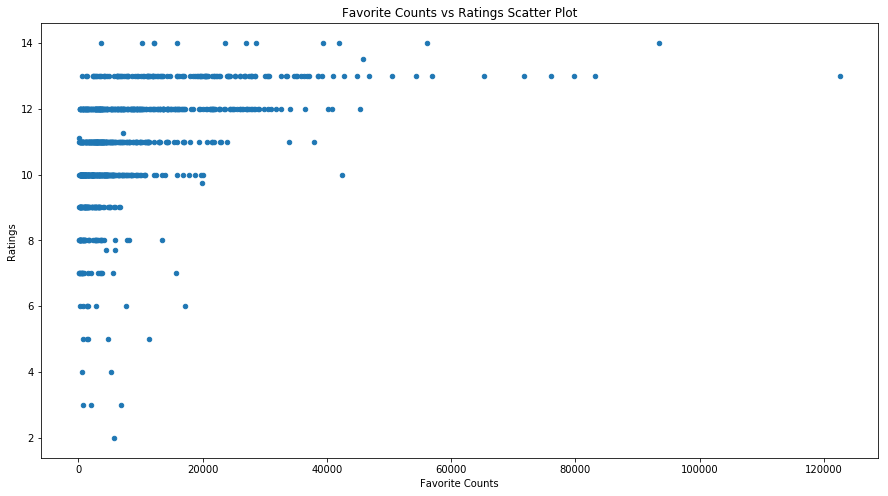

In [72]:
df_final.plot(x='favorite_count', y='rating', kind='scatter', figsize=(15,8))
plt.title('Favorite Counts vs Ratings Scatter Plot')
plt.xlabel('Favorite Counts')
plt.ylabel('Ratings')

fig = plt.gcf()
fig.savefig('scatter.png',bbox_inches='tight');

We see that the majority of ratings are greater than 10.

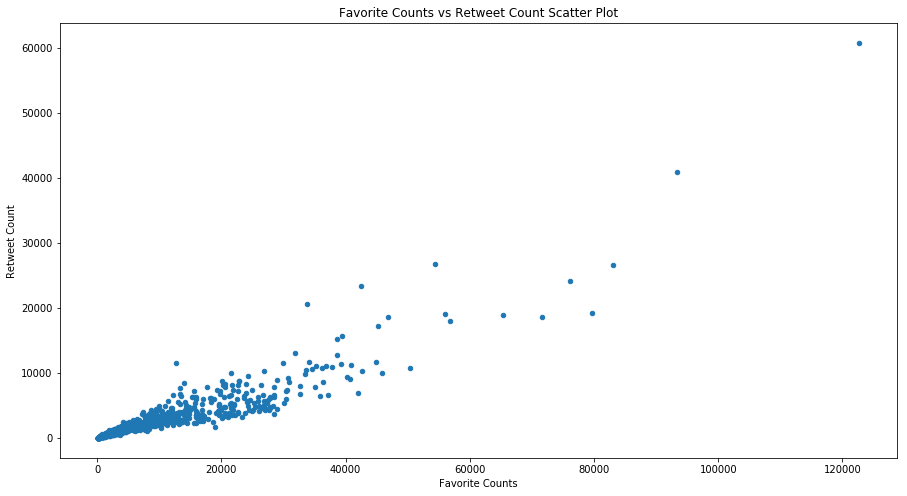

In [73]:
df_final.plot(x='favorite_count', y='retweet_count', kind='scatter', figsize=(15,8))
plt.title('Favorite Counts vs Retweet Count Scatter Plot')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count')

fig = plt.gcf()
fig.savefig('scatter2.png',bbox_inches='tight');

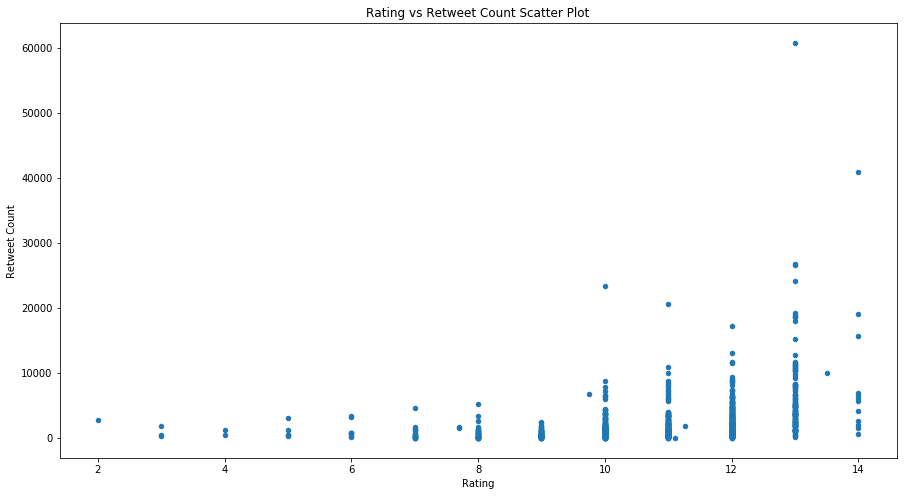

In [74]:
df_final.plot(x='rating', y='retweet_count', kind='scatter', figsize=(15,8))
plt.title('Rating vs Retweet Count Scatter Plot')
plt.xlabel('Rating')
plt.ylabel('Retweet Count')

fig = plt.gcf()
fig.savefig('scatter3.png',bbox_inches='tight');

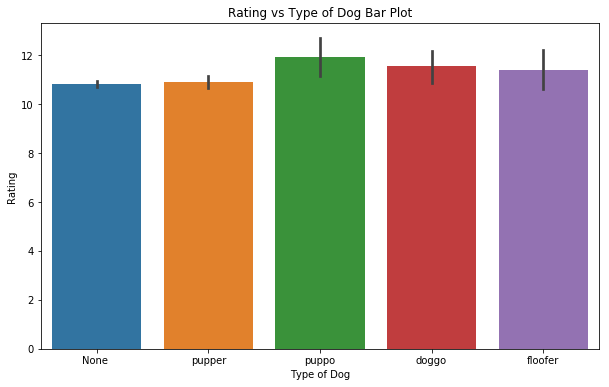

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x='stage', y= 'rating', data= df_final)
plt.title('Rating vs Type of Dog Bar Plot')
plt.xlabel('Type of Dog')
plt.ylabel('Rating')
fig = plt.gcf()
fig.savefig('barplot1.png' ,bbox_inches='tight');

The graph above shows us puppo dogs have best average rating. 

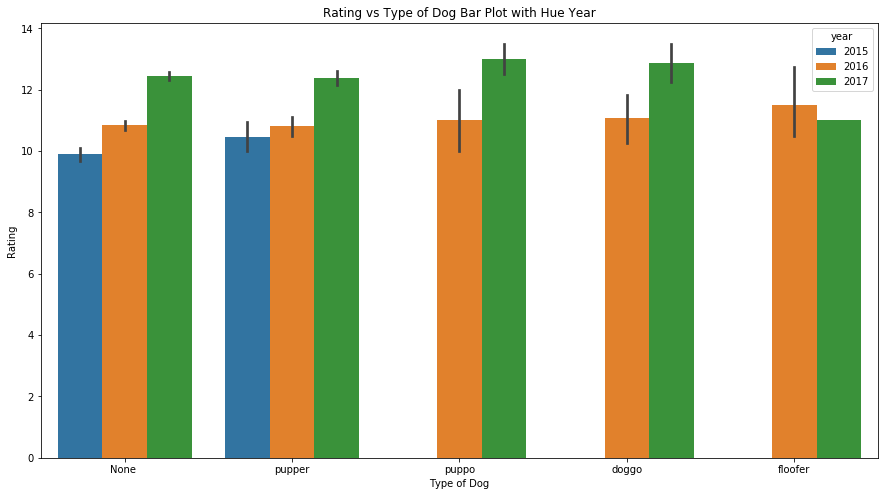

In [76]:
plt.figure(figsize=(15,8))
sns.barplot(x='stage', y= 'rating', hue='year', data= df_final)
plt.title('Rating vs Type of Dog Bar Plot with Hue Year')
plt.xlabel('Type of Dog')
plt.ylabel('Rating')
fig = plt.gcf()
fig.savefig('barplot2.png' ,bbox_inches='tight');

Also by adding year attribute as hue, we interpret that average rating is increasing by the time. In addition, there is no ratings for puppo, doggo and floofer at 2015.

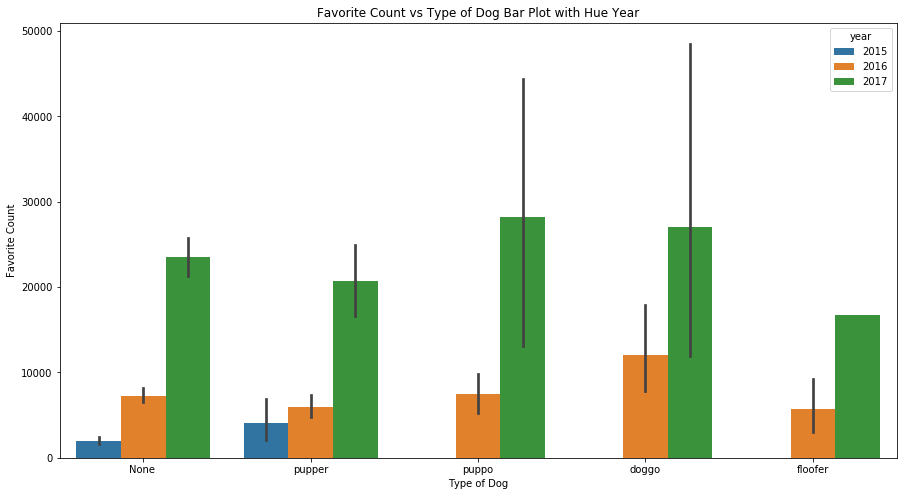

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(x='stage', y= 'favorite_count', hue='year', data= df_final)
plt.title('Favorite Count vs Type of Dog Bar Plot with Hue Year')
plt.xlabel('Type of Dog')
plt.ylabel('Favorite Count')
fig = plt.gcf()
fig.savefig('barplot3.png' ,bbox_inches='tight');

Puppo also most favorited dog and doggo follows.

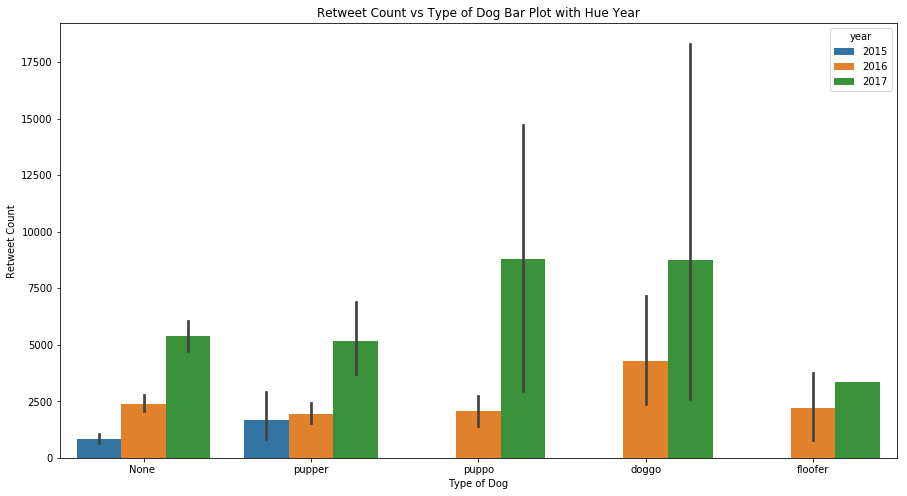

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(x='stage', y= 'retweet_count', hue='year', data= df_final)
plt.title('Retweet Count vs Type of Dog Bar Plot with Hue Year')
plt.xlabel('Type of Dog')
plt.ylabel('Retweet Count')
fig = plt.gcf()
fig.savefig('barplot4.png' ,bbox_inches='tight');

Retweet count shows similar pattern as favorive count.